# General Public

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('~/Downloads/2022_mlb_pitcher_values.csv')
df

,Rk,Name,Age,Tm,IP,G,GS,R,RA9,RA9opp,...,PPFp,RA9avg,RAA,WAA,gmLI,WAAadj,WAR,RAR,Salary,Name-additional
0,5,Jason Adam,30,TBR,63.1,67,0,12,1.71,4.37,...,93.2,3.86,15,1.7,1.58,0.3,2.7,21,900000,adamja01
1,6,Austin Adams,31,SDP,2.1,2,0,0,0.00,4.51,...,98.0,4.05,1,0.1,0.20,-0.1,0.1,1,925000,adamsau02
2,8,Ehire Adrianza,32,WSN,1.0,1,0,0,0.00,4.84,...,92.0,4.33,0,0.1,0.00,0.0,0.0,1,1500000,adriaeh01
3,10,Hanser Alberto,29,LAD,11.0,10,0,5,4.09,4.53,...,108.3,3.80,0,0.0,0.00,0.0,0.1,1,1350000,alberha01
4,12,Sandy Alcantara,26,MIA,228.2,32,32,67,2.64,4.60,...,98.0,4.61,50,5.9,NaN,-0.2,7.8,71,3800000,alcansa01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,852,Nick Wittgren,31,STL,29.0,29,0,19,5.90,4.28,...,92.5,3.26,-9,-0.9,0.74,0.0,-0.6,-6,1200000,wittgni01
281,853,Alex Wood*,31,SFG,130.2,26,26,78,5.37,4.24,...,100.8,4.82,-8,-0.8,NaN,-0.1,0.3,4,12500000,woodal02
282,855,Brandon Woodruff,29,MIL,153.1,27,27,56,3.29,4.18,...,100.1,4.10,14,1.5,NaN,-0.1,2.8,28,6800000,woodrbr01
283,862,Ryan Yarbrough*,30,TBR,80.0,20,9,44,4.95,4.47,...,95.6,4.19,-6,-0.7,0.72,-0.1,0.0,0,3850000,yarbrry01


For general public, I would like to select top 10 players so that they can understand easily. The top 10 players were selected by their WAR, which measures a player's value in all facets of the game by deciphering how many more wins he's worth than a replacement-level player at his same position.

In [ ]:
top_10 = df.sort_values(by='WAR', ascending=False).head(10)

A bar chart showing the top 10 pitchers by WAR

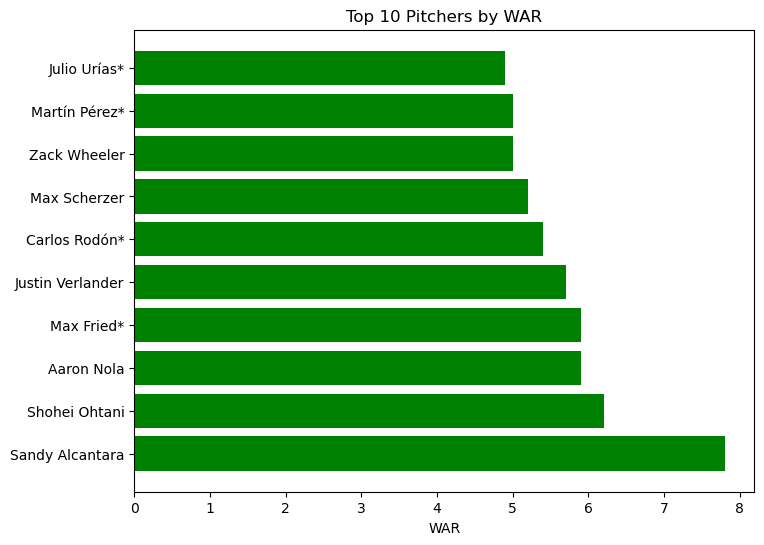

In [6]:
plt.figure(figsize=(8, 6))
plt.barh(top_10['Name'], top_10['WAR'], color='green')
plt.xlabel('WAR')
plt.title('Top 10 Pitchers by WAR')
plt.show()

A scatter plot showing the top 10 baseball pitchers by WAR and IP

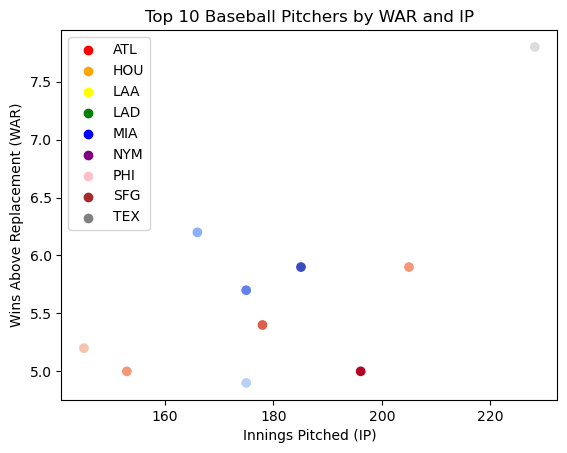

In [14]:
teams = top_10['Tm'].astype('category')

colors = {'ATL': 'red', 'HOU': 'orange', 'LAA': 'yellow', 'LAD': 'green',
          'MIA': 'blue', 'NYM': 'purple', 'PHI': 'pink', 'SFG': 'brown', 'TEX': 'gray'}

plt.scatter(top_10['IP'], top_10['WAR'], c=teams.cat.codes, cmap='coolwarm')

for team, color in colors.items():
    plt.scatter([], [], c=color, label=team)

plt.title('Top 10 Baseball Pitchers by WAR and IP')
plt.xlabel('Innings Pitched (IP)')
plt.ylabel('Wins Above Replacement (WAR)')
plt.legend()

plt.show()

A scatter plot showing the top 10 baseball pitchers by WAR, salary, and age

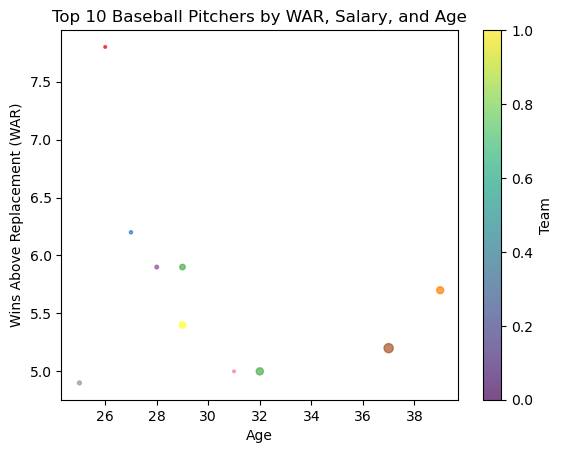

In [16]:
teams = top_10['Tm'].unique()
team_colors = plt.cm.Set1(np.linspace(0, 1, len(teams)))
team_dict = {team: color for team, color in zip(teams, team_colors)}

# Map team abbreviations to colors
colors = top_10['Tm'].map(team_dict)

# Create bubble chart with Age on x-axis, WAR on y-axis, and Salary as the size of the bubbles
plt.scatter(top_10['Age'], top_10['WAR'], s=top_10['Salary']/1000000, c=colors, alpha=0.7)

# Add a colorbar to show team colors
cbar = plt.colorbar()
cbar.set_label('Team')

# Add title and labels to the axes
plt.title('Top 10 Baseball Pitchers by WAR, Salary, and Age')
plt.xlabel('Age')
plt.ylabel('Wins Above Replacement (WAR)')

# Show the plot
plt.show()